In [1]:
#Importing Libary
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models
from keras.layers import Dropout
from keras.models import load_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Eksplorasi Datasets

In [24]:
df = pd.read_csv('Trace.csv')

In [25]:
df.head(100)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
...,...,...,...,...,...,...,...
95,96,0.015743,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=4293632837 Win=1...
96,97,0.015769,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
97,98,0.015813,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 96#1] 443 > 59620 [ACK] Seq=1 A...
98,99,0.015813,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 96#2] 443 > 59620 [ACK] Seq=1 A...


In [26]:
def label_serangan(row):
    if "Ignored Unknown Record" in row["Info"]:
        return "Serangan"
    else:
        return "Non-Serangan"

df["Label"] = df.apply(label_serangan, axis=1)
df.to_csv("datasets_label.csv", index=False)

In [27]:
df.head(1000)

,No.,Time,Source,Destination,Protocol,Length,Info,Label
0,1,0,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
1,2,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
2,3,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
3,4,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
4,5,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
...,...,...,...,...,...,...,...,...
995,996,0.030963,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 994#1] 443 > 59620 [ACK] Seq=1 ...,Non-Serangan
996,997,0.030963,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 994#2] 443 > 59620 [ACK] Seq=1 ...,Non-Serangan
997,998,0.030963,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 994#3] 443 > 59620 [ACK] Seq=1 ...,Non-Serangan
998,999,0.030963,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 994#4] 443 > 59620 [ACK] Seq=1 ...,Non-Serangan


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253675 entries, 0 to 253674
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   No.          253675 non-null  int64 
 1   Time         253675 non-null  object
 2   Source       253675 non-null  object
 3   Destination  253403 non-null  object
 4   Protocol     253675 non-null  object
 5   Length       253675 non-null  int64 
 6   Info         253675 non-null  object
 7   Label        253675 non-null  object
dtypes: int64(2), object(6)
memory usage: 15.5+ MB


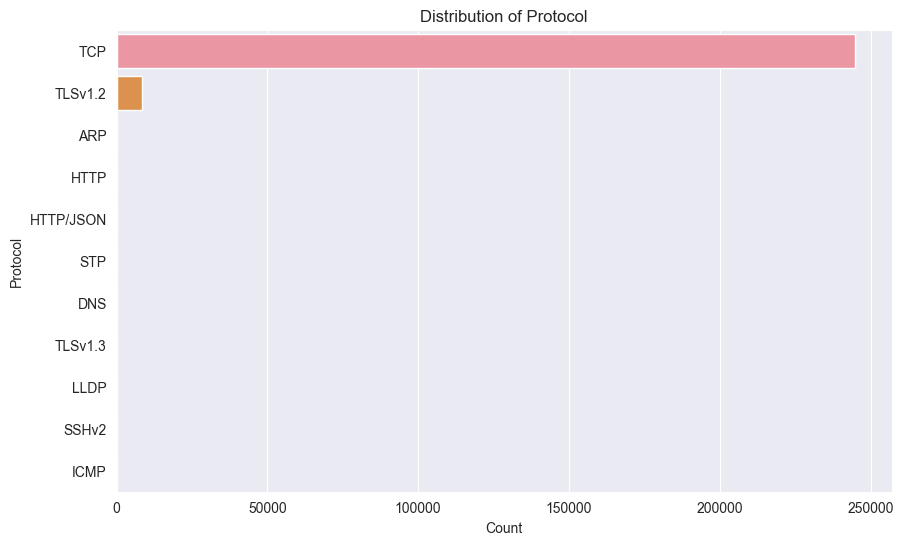


Statistik deskriptif untuk setiap protocol:
                No.                                                      
              count           mean            std       min        25%   
Protocol                                                                 
ARP           250.0  148606.376000   69953.682629    3477.0   88537.25  \
DNS            11.0   37031.636364   27333.168811   13238.0   13240.50   
HTTP           56.0  154720.946429   63466.623965   65586.0   74623.50   
HTTP/JSON      44.0  153274.636364   61539.743433   65588.0  117201.75   
ICMP            1.0   65582.000000            NaN   65582.0   65582.00   
LLDP            2.0  113042.500000  141125.078496   13252.0   63147.25   
SSHv2           2.0  142543.500000   19150.572955  129002.0  135772.75   
STP            20.0  148804.050000   67068.031227   21810.0   99740.75   
TCP        244680.0  126818.146579   73234.314942      12.0   63390.75   
TLSv1.2      8601.0  126580.662946   73161.718306       1.0   62811

In [29]:
# Menampilkan jumlah setiap kategori
category_counts = df['Protocol'].value_counts()

# Plotting jumlah setiap kategori
plt.figure(figsize=(10, 6))
sns.countplot(y='Protocol', data=df, order=category_counts.index)
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.title('Distribution of Protocol')
plt.show()

# Menampilkan statistik deskriptif
protocol_graf = df.groupby('Protocol').describe()
print("\nStatistik deskriptif untuk setiap protocol:")
print(protocol_graf)


Filtering Protocol

In [30]:
##### Focus on TLSV1.2 #####
#####################
df = df[df["Protocol"] == "TLSv1.2"]
# Delete Column "No."
df = df.drop("No.", axis=1)

# Menyimpan dataset yang sudah diubah
df.to_csv("dataset_TCP.csv", index=False)

In [31]:
df.head(1000)

,Time,Source,Destination,Protocol,Length,Info,Label
0,0,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
1,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
2,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
3,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
4,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record,Serangan
...,...,...,...,...,...,...,...
29864,2.408.030,10.10.1.198,172.217.194.95,TLSv1.2,64468,"Application Data, Application Data, Applicatio...",Non-Serangan
29865,2.408.065,10.10.1.198,172.217.194.95,TLSv1.2,64468,"Application Data, Application Data, Applicatio...",Non-Serangan
29866,2.411.018,10.10.1.198,172.217.194.95,TLSv1.2,64468,"Application Data, Application Data, Applicatio...",Non-Serangan
29867,2.411.060,10.10.1.198,172.217.194.95,TLSv1.2,64468,"Application Data, Application Data, Applicatio...",Non-Serangan


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8601 entries, 0 to 253670
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Time         8601 non-null   int32
 1   Source       8601 non-null   int32
 2   Destination  8601 non-null   int32
 3   Protocol     8601 non-null   int32
 4   Length       8601 non-null   int64
 5   Info         8601 non-null   int32
 6   Label        8601 non-null   int32
dtypes: int32(6), int64(1)
memory usage: 336.0 KB


Labeling

In [41]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = le.fit_transform(df[column])
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.dtypes

Time           int32
Source         int32
Destination    int32
Protocol       int32
Length         int64
Info           int32
Label          int32
dtype: object

In [42]:
df.head(1000)

,Time,Source,Destination,Protocol,Length,Info,Label
0,0,0,1,0,64468,6,1
1,1,0,1,0,64468,6,1
2,2,0,1,0,64468,6,1
3,3,0,1,0,64468,6,1
4,4,0,1,0,64468,6,1
...,...,...,...,...,...,...,...
29864,3363,0,1,0,64468,3,0
29865,3364,0,1,0,64468,3,0
29866,3365,0,1,0,64468,3,0
29867,3366,0,1,0,64468,3,0


Split Dataset

In [43]:
#Splitting datasets into train and validation : 80% train and 20% validation
X = df.drop('Label', axis=1)
y = df['Label']
x_train,x_val,y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Convert Dataframe to array Numpy
x_train = np.array(x_train)
x_val = np.array(x_val)

# Reshape the data for input to CNN 1D
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)

Modeling

In [44]:
# Arsitektur model
model = models.Sequential([
    layers.Conv1D(filters =16, kernel_size=1, activation='relu', input_shape=(x_train.shape[1],1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Kompilasi model dengan optimizer dan loss function
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model_train = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
108/108 [==============================] - 3s 20ms/step - loss: 1.7150 - accuracy: 0.9799 - val_loss: 0.2803 - val_accuracy: 0.9907
Epoch 2/20
108/108 [==============================] - 2s 16ms/step - loss: 0.4500 - accuracy: 0.9847 - val_loss: 0.1263 - val_accuracy: 0.9907
Epoch 3/20
108/108 [==============================] - 2s 20ms/step - loss: 0.2414 - accuracy: 0.9881 - val_loss: 0.0987 - val_accuracy: 0.9907
Epoch 4/20
108/108 [==============================] - 3s 24ms/step - loss: 0.2391 - accuracy: 0.9866 - val_loss: 0.1152 - val_accuracy: 0.9907
Epoch 5/20
108/108 [==============================] - 2s 22ms/step - loss: 0.1722 - accuracy: 0.9872 - val_loss: 0.0837 - val_accuracy: 0.9907
Epoch 6/20
108/108 [==============================] - 2s 18ms/step - loss: 0.1377 - accuracy: 0.9882 - val_loss: 0.0687 - val_accuracy: 0.9907
Epoch 7/20
108/108 [==============================] - 2s 17ms/step - loss: 0.1096 - accuracy: 0.9874 - val_loss: 0.0692 - val_accuracy: 0.9907

In [45]:
model.save('model.h5')

Evaluasi

In [46]:
# Evaluasi model
loss, accuracy = model.evaluate(x_train, y_train)
print("Loss:", loss)
print("Accuracy:", accuracy)

215/215 [==============================] - 2s 8ms/step - loss: 0.0602 - accuracy: 0.9897
Loss: 0.06019529327750206
Accuracy: 0.9896802306175232


In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#predict on validation set
y_pred = model.predict(x_val)
y_pred_classes = (y_pred > 0.5).astype(int)

#Print classification report
print("Classisfication Report:\n", classification_report(y_val, y_pred_classes))

#Print confusion matrix
print("Confusion metrix:\n", confusion_matrix(y_val, y_pred_classes))


54/54 [==============================] - 0s 5ms/step
Classisfication Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1705
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1721
   macro avg       0.50      0.50      0.50      1721
weighted avg       0.98      0.99      0.99      1721

Confusion metrix:
 [[1705    0]
 [  16    0]]


C:\Users\USER\AnalisisBigData\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AnalisisBigData\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AnalisisBigData\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing

In [48]:
dftest = pd.read_csv('test.csv')

In [21]:
dftest.head(1000)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1 Win=15371 Len=...
1,2,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#1] 443 > 59620 [ACK] Seq=1 Ac...
2,3,0.000000,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 1#2] 443 > 59620 [ACK] Seq=1 Ac...
3,4,0.000101,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1401 Win=15371 L...
4,5,0.000101,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 4#1] 443 > 59620 [ACK] Seq=1 Ac...
...,...,...,...,...,...,...,...
995,996,0.021872,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 995#1] 443 > 59620 [ACK] Seq=1 ...
996,997,0.021872,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 995#2] 443 > 59620 [ACK] Seq=1 ...
997,998,0.021872,172.217.194.95,10.10.1.198,TCP,96,443 > 59620 [ACK] Seq=1 Ack=1845313 Win=1537...
998,999,0.021935,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 998#1] 443 > 59620 [ACK] Seq=1 ...


In [22]:
##### Fokus TCP #####
#####################
dftest = dftest[dftest["Protocol"] == "TCP"]
# Menghapus kolom "No."
dftest = dftest.drop("No.", axis=1)

# Menyimpan dataset yang sudah diubah
dftest.to_csv("test_TCP.csv", index=False)

In [23]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241416 entries, 0 to 250686
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         241416 non-null  float64
 1   Source       241416 non-null  object 
 2   Destination  241416 non-null  object 
 3   Protocol     241416 non-null  object 
 4   Length       241416 non-null  int64  
 5   Info         241416 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.9+ MB


In [24]:
le = LabelEncoder()
for column in dftest.columns:
    if dftest[column].dtype == 'float64':
        dftest[column] = le.fit_transform(dftest[column])
    if dftest[column].dtype == 'object':
        dftest[column] = le.fit_transform(dftest[column])
dftest.dtypes

Time           int64
Source         int32
Destination    int32
Protocol       int32
Length         int64
Info           int32
dtype: object

In [25]:
dftest.head(1000)

,Time,Source,Destination,Protocol,Length,Info
0,0,6,1,0,96,26025
1,0,6,1,0,96,67821
2,0,6,1,0,96,67822
3,1,6,1,0,96,26090
4,1,6,1,0,96,193849
...,...,...,...,...,...,...
1037,286,6,1,0,96,26188
1038,286,6,1,0,96,70770
1039,286,6,1,0,96,70771
1040,286,6,1,0,96,26190


In [26]:
loaded_model = load_model('model.h5')

In [27]:
predictions = loaded_model.predict(dftest)
predictions.shape

7545/7545 [==============================] - 9s 1ms/step


(241416, 1)

In [28]:
predictions

array([[7.9503559e-09],
       [6.5425217e-01],
       [6.5432876e-01],
       ...,
       [9.9991030e-01],
       [3.3937205e-02],
       [9.9991030e-01]], dtype=float32)

In [33]:
# Impor pustaka yang diperlukan
from keras.models import load_model
import numpy as np

# Muat model yang telah Anda latih
model = load_model('model.h5')  # Ganti 'model.h5' dengan nama model Anda

# Muat dataset test (gantilah dengan cara yang sesuai dengan dataset Anda)
x_test = pd.read_csv('test_TCP.csv')

le = LabelEncoder()
for column in x_test.columns:
    if x_test[column].dtype == 'float64':
        x_test[column] = le.fit_transform(x_test[column])
    if x_test[column].dtype == 'object':
        x_test[column] = le.fit_transform(x_test[column])


In [37]:
# Lakukan prediksi
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Tampilkan hasil prediksi
y_pred_binary

7545/7545 [==============================] - 9s 1ms/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

cek dataset

In [38]:
dftest2 = pd.read_csv('test_TCP.csv')

In [40]:
def label_serangan(row):
    if "TCP Dup ACK" in row["Info"]:
        return "Serangan"
    else:
        return "Non-Serangan"

dftest2["Label"] = dftest2.apply(label_serangan, axis=1)

In [41]:
df.head(1000)

,Time,Source,Destination,Protocol,Length,Info,Label
43,0,4,1,0,80,652,0
44,0,4,1,0,80,195922,1
45,0,4,1,0,80,195923,1
48,1,4,1,0,80,653,0
49,1,4,1,0,88,199525,1
...,...,...,...,...,...,...,...
1074,277,4,1,0,96,74306,1
1075,278,4,1,0,96,74307,1
1076,278,4,1,0,96,165,0
1077,278,4,1,0,96,74601,1
